<a href="https://colab.research.google.com/github/marcioshochi/data-scientist-trainning/blob/master/treinamentoMachineLearning_exercicio01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
#selecionando filme dataframe
url = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(url)
filmes.columns = ["filme_id", "titulo", "generos"]
filmes.head(10)

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [3]:
# selecionando generos do filme no dataframe
generos = filmes.generos.str.get_dummies()
generos.head(10)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
# juntando dataframe filmes e generos no mesmo dataframe
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,8,Tom and Huck (1995),Adventure|Children,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),Action,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [6]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.62380291  0.14079921 -0.2325662  -0.26780679 -0.57099333
   0.44695314 -0.21588483 -0.20331388  0.01723742  0.17780699  0.62174866
   0.15387243 -0.17743113  0.40007824 -0.34990123  0.46540808  1.05802301
  -0.14021594 -0.05505026]
 [ 0.04030772 -0.31751412 -0.21590944 -0.25227359 -0.27045122  0.25801706
  -0.17975763  0.14480917  0.20158146 -0.14848199 -0.07658311 -0.27663377
  -0.11336962  0.02875527 -0.18544487  0.22594932 -0.26100198 -0.47076514
   0.10025651  0.04209063]
 [-0.05917995 -0.033867    0.87595856  2.28314655  2.50629282  0.23080566
  -0.31671343 -0.20221857 -0.58987274  0.8548876  -0.09492563 -0.27777491
   0.20634864  0.38671671 -0.13317313 -0.27412553  0.12242791 -0.47256138
 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f44a73ac898>,
      dtype=object)

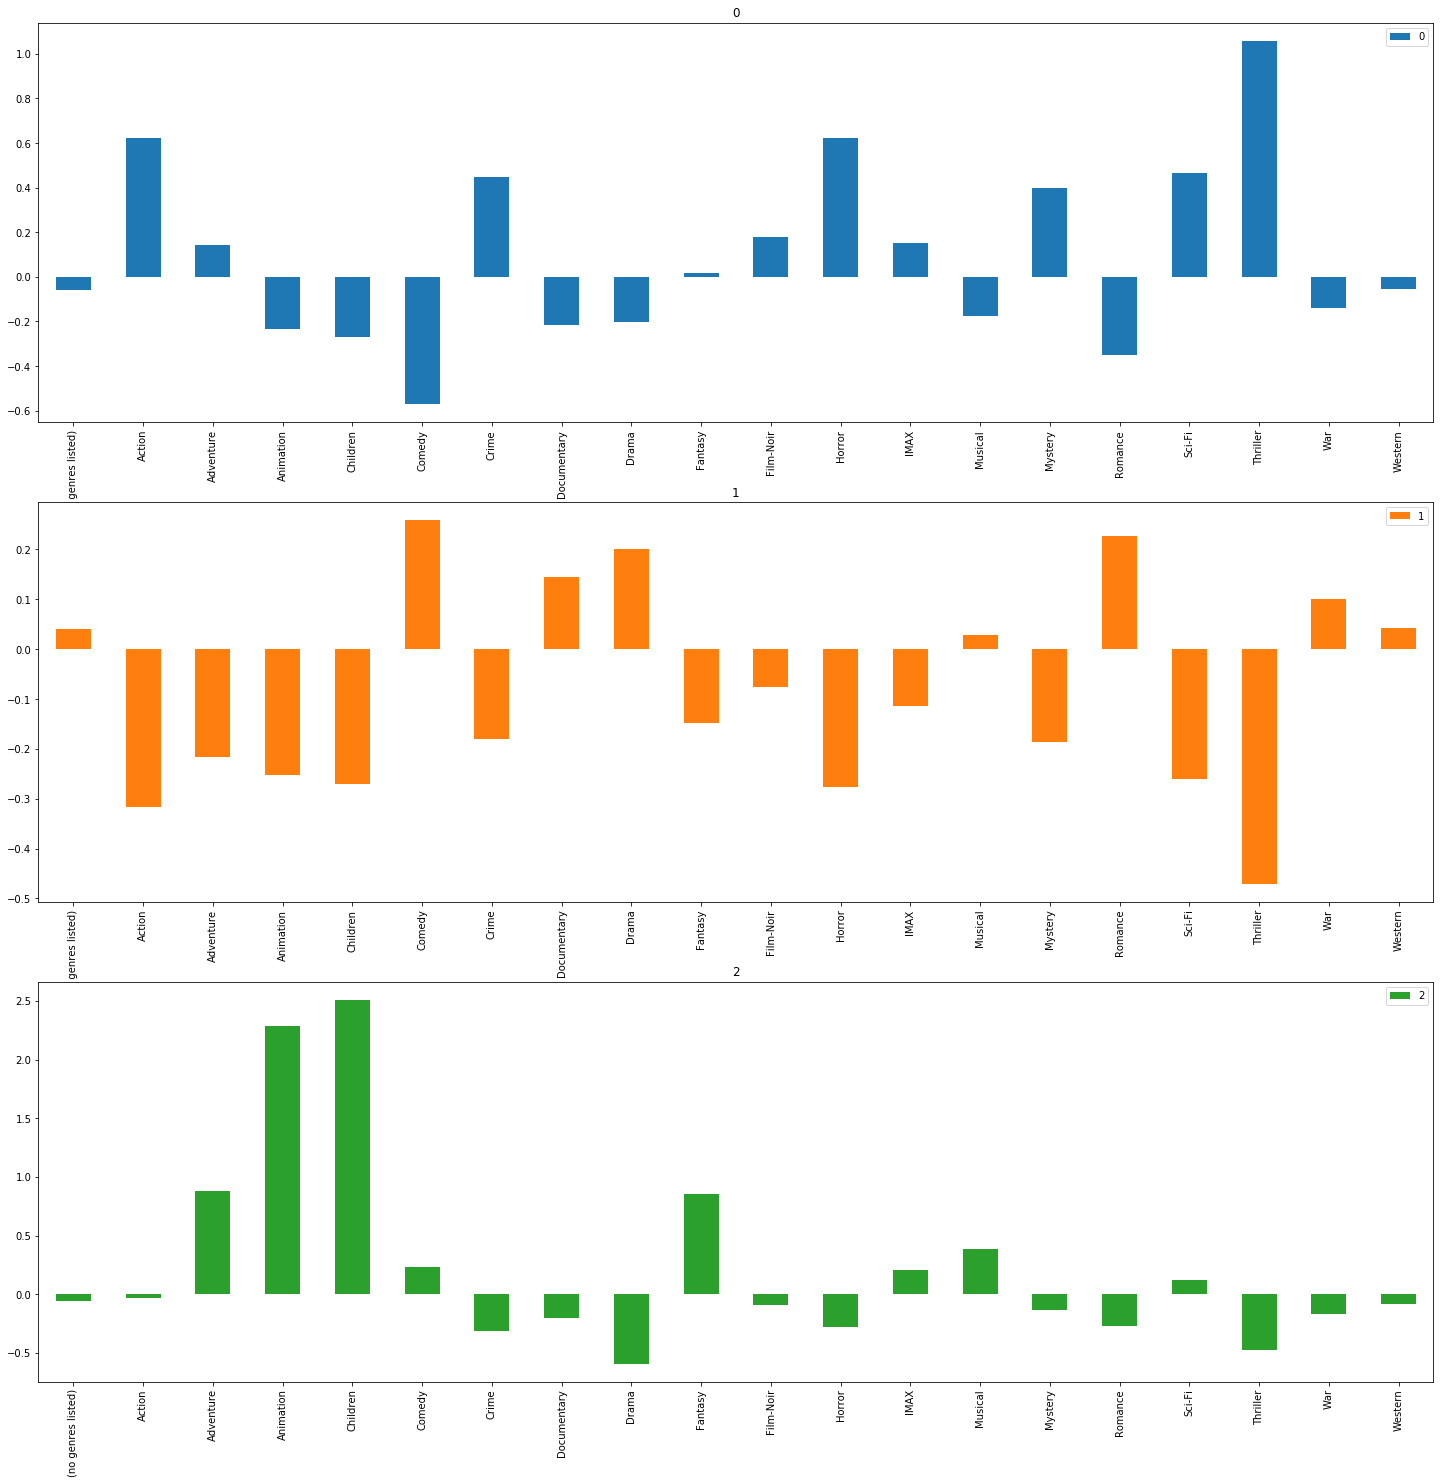

In [8]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns = generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25, 25), sharex = False) 

In [9]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
633,805,"Time to Kill, A (1996)",Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5146,8268,Point of No Return (1993),Action|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3616,4965,"Business of Strangers, The (2001)",Action|Drama|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3099,4159,3000 Miles to Graceland (2001),Action|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4083,5833,Dog Soldiers (2002),Action|Horror,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
156,185,"Net, The (1995)",Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6536,54372,Tell No One (Ne le dis à personne) (2006),Crime|Drama|Mystery|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
9342,160836,Hazard (2005),Action|Drama|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7780,91688,Salvation Boulevard (2011),Comedy|Thriller,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
349,393,Street Fighter (1994),Action|Adventure|Fantasy,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.manifold import TSNE
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)


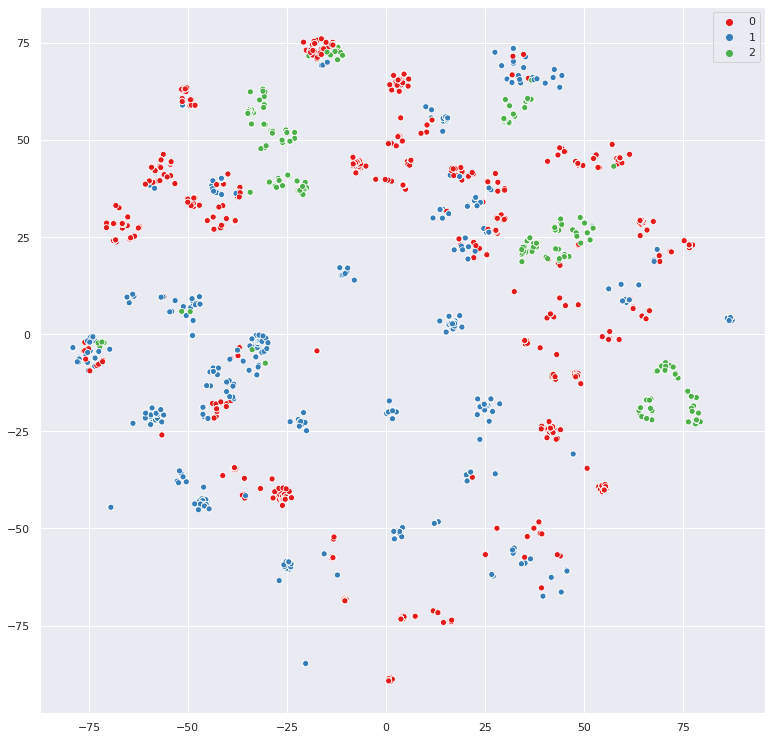

In [11]:
import seaborn as sns
sns.set(rc = {'figure.figsize': (13, 13)})
sns.scatterplot(x = visualizacao[:, 0], 
                y = visualizacao[:, 1],
                hue = modelo.labels_,
                palette=sns.color_palette('Set1', 3)
                )

Vamos tentar fazer um agrupamento um pouquinho diferente do primeiro. Neste caso, vamos criar um modelo K-Means e falar para ele agrupar os dados em 20 grupos (um para cada gênero). Com o modelo criado, vamos treiná-lo passando os generos_escalados:

In [12]:
modelo = KMeans(n_clusters= 20)
modelo.fit(generos_escalados)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Como antes, vamos criar um data dataframe a partir do centroides do grupo:

In [0]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0)

Como antes, vamos pegar algum grupo e fazer uma filtragem no data frame de filmes para ver como foram agrupados

In [14]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2204,2929,Reds (1981),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6265,47382,Step Up (2006),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5891,33310,"Common Thread, A (a.k.a. Sequins) (Brodeuses) ...",Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4644,6942,Love Actually (2003),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6141,43919,Date Movie (2006),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1873,2491,Simply Irresistible (1999),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6070,40962,"Yours, Mine and Ours (2005)",Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6574,55190,Love and Other Disasters (2006),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
976,1277,Cyrano de Bergerac (1990),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


Aparentemente, os dados foram agrupados de uma maneira que faz sentido. Mas então, quantos grupos devemos usar?

Vamos criar a função que recebe o número de clusters e os dados e retorna o número de clusters e o erro (inertia_) daquele modelo:

In [0]:
def kmeans(numero_de_clusters, generos):
   modelo = KMeans(n_clusters= numero_de_clusters)
   modelo.fit(generos)
   return [numero_de_clusters, modelo.inertia_]

Vamos rodar essa função começando a agrupar em um único grupo e ir agrupando até 40 grupos. Para isso, vamos usar uma compressão de lista do Python:

In [0]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]

In [0]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])

Para facilitar o trabalho, vamos transformar essa variável em um data frame para facilitar sua manipulação:

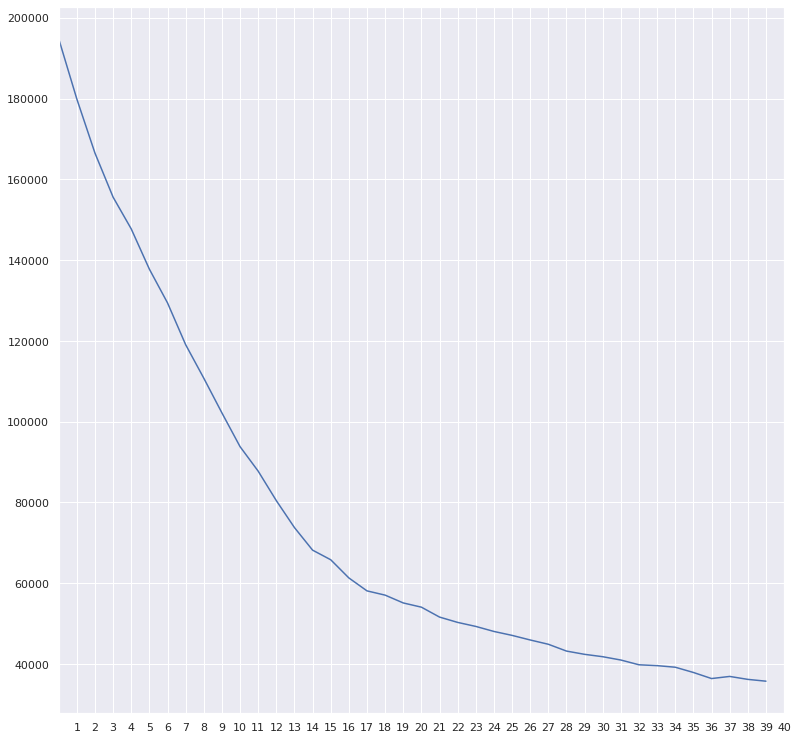

In [24]:
resultado.inertia.plot(xticks=resultado.grupos)

Podemos ver que o ponto de quebra no gráfico foi próximo ao número 17, logo, esse é o número de clusters que otimiza nosso modelo. Podemos rodar um novo modelo com 17 grupos e mostrar seus centroides:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f44a14ce668>,
      dtype=object)

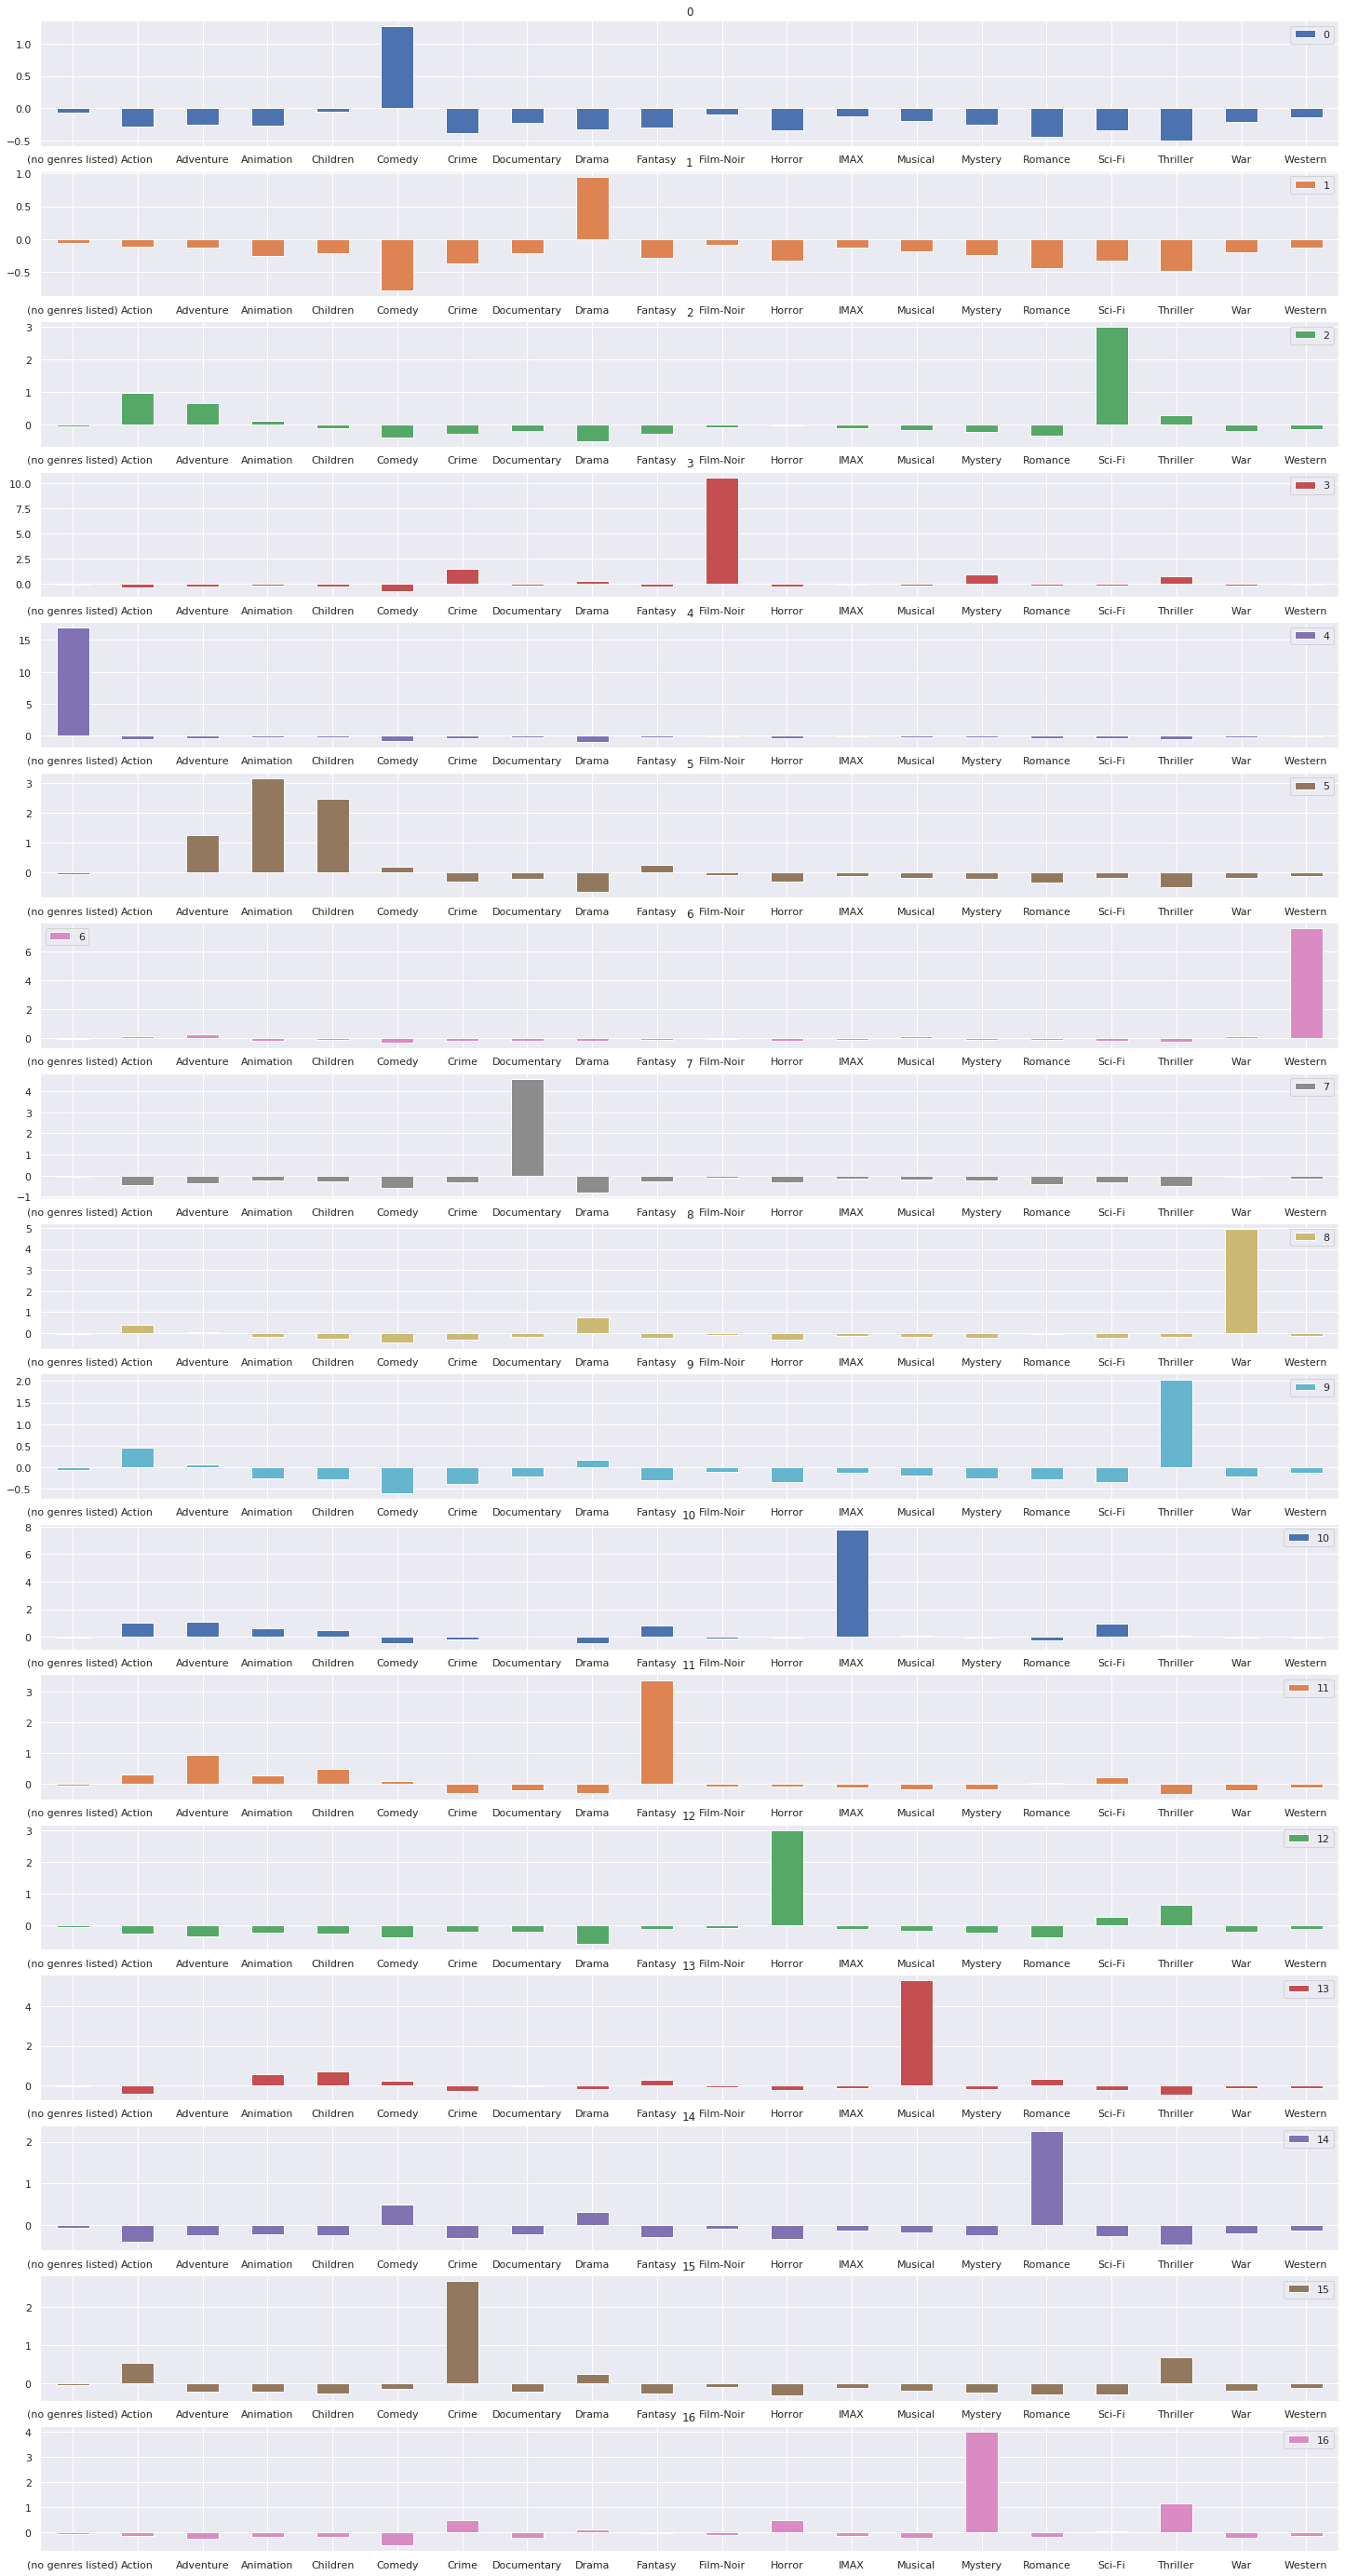

In [25]:
modelo = KMeans(n_clusters= 17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0)

Podemos também realizar um filtro por algum grupo para ver se fazem sentido:

In [26]:
grupo = 16
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4309,6297,Holes (2003),Adventure|Children|Comedy|Mystery,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
6782,60303,Strange Circus (Kimyô na sâkasu) (2005),Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
8533,114935,Predestination (2014),Action|Mystery|Sci-Fi|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
7225,73323,"Girl Who Kicked the Hornet's Nest, The (Luftsl...",Action|Crime|Mystery,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5397,9005,Fire in the Sky (1993),Drama|Mystery|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
5298,8778,Sherlock Holmes: Dressed to Kill (1946),Crime|Mystery,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7250,74228,Triangle (2009),Drama|Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2135,2841,Stir of Echoes (1999),Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1321,1783,Palmetto (1998),Crime|Drama|Mystery|Romance|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0
